In [64]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model('model2.h5')
from PIL import ImageTk, Image, ImageDraw
import PIL
from PIL import ImageGrab, Image
from tkinter import *
import tkinter as tk
import win32gui

import numpy as np
import matplotlib.pyplot as plt
class_names = ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

In [105]:
width = 45  # canvas width
height = 45 # canvas height
center = width/2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=2)
    draw.line([x1, y1, x2, y2],fill="black",width=2)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

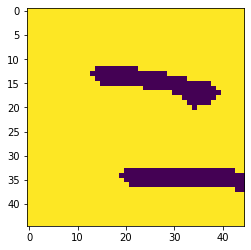

In [106]:
from PIL import Image
from numpy import asarray
import cv2
image =cv2.imread('user_input.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

In [107]:
img = tf.keras.utils.load_img(
        'user_input.png', color_mode = 'grayscale',target_size=(45,45)
)
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([image])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions

1/1 [==============================] - 0s 13ms/step


array([[ -78.33872 ,  -83.919   ,  -75.38223 ,  -64.946365, -145.77919 ,
         -60.97324 , -163.28108 , -104.76299 , -118.51751 ,  -87.384445,
        -116.41227 , -126.661674, -144.5982  , -151.44618 , -171.84346 ,
         -93.3394  ,  -19.616617,  -40.738758,  -76.66178 ,  -74.94142 ,
        -184.1861  , -146.08627 , -178.61813 , -121.33326 , -173.68709 ,
         -98.718765, -171.78871 , -109.69953 ,  -56.9046  ,  -99.78378 ,
        -175.3247  ,  -79.36038 , -125.913574,  -55.49682 ,  -61.486465,
         -74.93466 ,  -66.86389 , -163.34128 ,  -36.305798, -121.00234 ,
         -43.623608,  -64.16972 , -113.71338 ,  -77.50303 ,  -76.959366,
        -140.7213  ,  -56.196003, -153.16245 , -103.94985 ,  -99.31469 ,
        -100.176384, -160.47292 ,  -79.48024 ,  -51.443558,  -93.05736 ,
         -76.65398 ,  -31.664156,  -73.57612 ,  -60.73015 ,  -74.4313  ,
        -102.8292  ,  -81.36507 ,  -84.43013 , -116.29912 ,  -51.460793,
         -70.28014 , -139.44235 ,  -44.24815 ,  -95

In [108]:
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
score

This image most likely belongs to = with a 100.00 percent confidence.


<tf.Tensor: shape=(82,), dtype=float32, numpy=
array([3.14275436e-26, 1.18529685e-28, 6.04362560e-25, 2.05843508e-20,
       0.00000000e+00, 1.09407033e-18, 0.00000000e+00, 1.05049875e-37,
       0.00000000e+00, 3.70512472e-30, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.60723304e-33,
       9.99994159e-01, 6.71070588e-10, 1.68111202e-25, 9.39159615e-25,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.42965818e-35, 0.00000000e+00, 0.00000000e+00,
       6.39784764e-17, 1.52699959e-35, 0.00000000e+00, 1.13138185e-26,
       0.00000000e+00, 2.61470786e-16, 6.54866225e-19, 9.45529568e-25,
       3.02528344e-21, 0.00000000e+00, 5.64909008e-08, 0.00000000e+00,
       3.74881515e-11, 4.47536442e-20, 0.00000000e+00, 7.24848910e-26,
       1.24841035e-25, 0.00000000e+00, 1.29948989e-16, 0.00000000e+00,
       2.36885290e-37, 2.44097601e-35, 1.03117996e-35, 0.00000000e+00,
       1.00358846e-26, 1.50568

In [118]:

def predict_digit(i):
    i = i.convert('L')
    i = i.resize((45,45))
    ia = tf.keras.utils.img_to_array(i)
    ia = np.array([ia])
    #predicting the class
    r = model.predict(ia)
    s = tf.nn.softmax(r[0])
    return class_names[np.argmax(s)],  np.max(s)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=6.667
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

1/1 [==============================] - 0s 11ms/step
